<a href="https://colab.research.google.com/github/hantablack9/IIT-Roorkee-DS-ML-course-work/blob/main/Assignment_4_Advanced_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Generate the 2D data using the following piece of code:

> `import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(300, noise=.08, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);`

i) Build a clustering instance using Gaussian Mixture Model to cluster the above
data in two clusters.

ii) Visualize the result of above clustering. Explain the reason for clustering error.

iii) Use GMM as a generative model for generating 100 new such sample points.

iv) Again perform the clustering of those 100 points using model described in part
(a).

v) Optional: generate some face images from LFW dataset using the GMM based
generative model.


# 1.i Build a clustering instance using Gaussian Mixture Model to cluster the above data in two clusters.

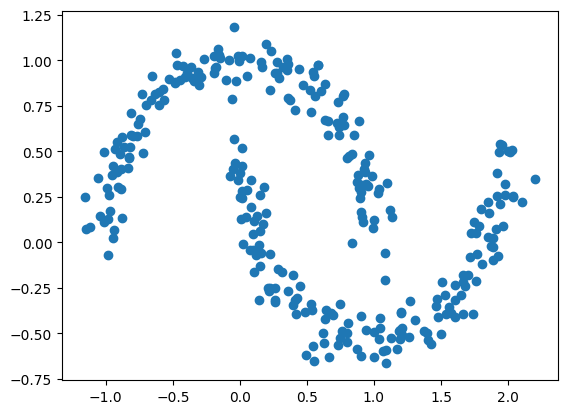

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(300, noise=.08, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, max_iter = 400)
gmm.fit(Xmoon)

GaussianMixture(max_iter=400, n_components=2)

# 1.ii Visualize the result of above clustering. Explain the reason for clustering error.

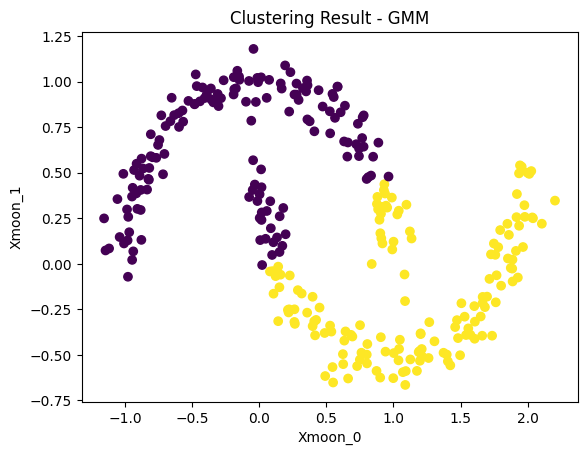

In [ ]:
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=gmm.predict(Xmoon))
plt.title('Clustering Result - GMM')
plt.xlabel('Xmoon_0')
plt.ylabel('Xmoon_1')
plt.show();

An explanation for clustering error of points is:

The make moons dataset has two overlapping clusters which are not linearly separable. In addition, Gaussian Mixtures Model assumes that the data is a mixture of gaussians with characteristic means and covariances for each component. 

GMM, while assigning soft probabilities to the data points, and being based on the Expectation-Maximization Algorithm, may misclassify points falling in the overlapped region of the moon arm clusters. As a result, the clustering performance of GMM can be compromised in such overlapping, non-linear distributions, resulting in clustering errors.

# 1.iii Use GMM as a generative model for generating 100 new such sample points.

In [ ]:
X_sample, y_sample = gmm.sample(100)

# 1.iv Again perform the clustering of those 100 points using model described in part (a).

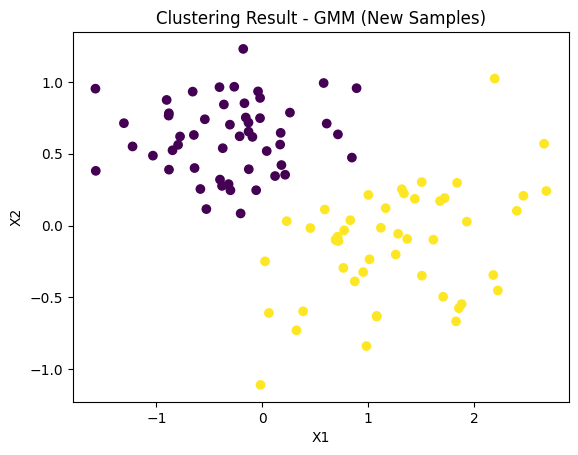

In [ ]:
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=gmm.predict(X_sample))
plt.title('Clustering Result - GMM (New Samples)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# 1.v Optional: generate some face images from LFW dataset using the GMM based generative model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=140)
print(np.unique(faces.target))
print(faces.images.shape)
print(faces.target_names)

[0 1 2]
(910, 62, 47)
['Colin Powell' 'George W Bush' 'Tony Blair']


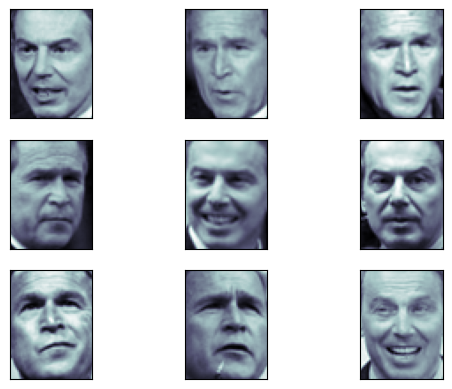

In [ ]:
#Lets plot few of them:
fig, axs = plt.subplots(3, 3)
for i, ax in enumerate(axs.flat):
    ax.imshow(faces.images[i], cmap='bone')
    ax.set(xticks=[], yticks=[])

In [ ]:
from sklearn.decomposition import PCA
newarr = faces.images.reshape(910, 62*47)
pca = PCA(0.99999)
pca_faces = pca.fit_transform(newarr)
print(pca_faces.shape)

(910, 904)


In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=300, max_iter=10000, )
gmm.fit(pca_faces)
labels = gmm.predict(pca_faces)
labels.shape

(910,)

In [ ]:
sample_f = gmm.sample(10)
data_f=sample_f[0]
print(data_f[1].shape)

(904,)


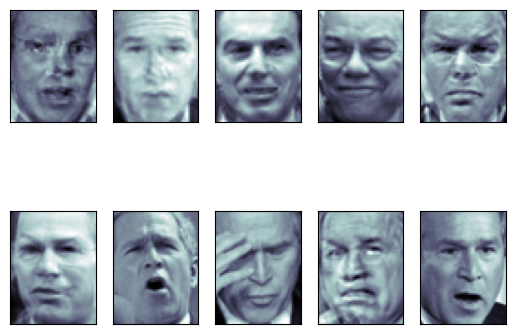

In [ ]:

sample_f = pca.inverse_transform(data_f)
sanmple_images = sample_f.reshape(10, 62, 47)

#Lets plot few of them:
fig, axs = plt.subplots(2, 5)
for i, ax in enumerate(axs.flat):
    ax.imshow(sanmple_images[i], cmap='bone')
    ax.set(xticks=[], yticks=[])

# 2) Download the Liver patient data from the following sources:
https://www.kaggle.com/uciml/indian-liver-patient-records
Use the following 07 features from this dataset:
* Age; 
* Total_Bilirubin; 
* Direct_Bilirubin; 
* Alkaline_Phosphotase;
* Alamine_Aminotransferase;
* Total_Protiens; 
* Albumin

Your task is to predict whether a patient suffers from a liver disease using above
features. Split your data into test and train.
First use a random forest algorithm for performing this task.
Then, use a Adaboost Classifier to perform similar task.
Compare the accuracy of these two algorithms.

## 2.0.1 Dataset context

The Indian Liver Patients Dataset is generated from a study done on liver patients in the North East region of Andhra Pradesh, India. This region, where I come from, sees a high rate of alcohol abuse, which is a leading cause of liver health issues. 

This region also typically sees males consuming more alcohol than females, so we may expect to see a higher prevalance of liver disorders among males than in females. The feature descriptions are self-explanatory, so let's dive into the addressing the problem at hand.

The problem relates to predicting whether a subject suffers from a liver disease, based on liver function diagnostic results. There are 167 healthy subjects and 416 patients in this dataset, encoded as 2 & 1, respectively. I will train and compare the performances of two different Advanced Machine Learning Classifiers - AdaBoostClassifier and RandomForestClassifier, for this purpose.

## 2.0.2 Workflow:



1. Loading the dataset
2. Preprocessing and EDA: Missing Values handling, Feature Engineering
3. Model Training, Hyperparameter Tuning and Evaluation
4. Conclusion: Comparison of Estimators




## 2.1 Import block and loading the dataset


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set plot style
sns.set(color_codes=True)
%matplotlib inline
plt.rcParams['figure.figsize']=15,8
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
## Deactivate this code block if you are not running it in Google Colab

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/


Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [4]:
liv = pd.read_csv('indian_liver_patient.csv')

In [5]:
liv.rename(columns = {'Dataset':'liver_disease_YN'}, inplace =True)

In [55]:
df = liv.copy()

## 2.2  Preprocessing and EDA: Missing Values handling, Feature Engineering

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  liver_disease_YN            583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count 583.000          583.000           583.000               583.000   
mean   44.746            3.299             1.486               290.576   
std    16.190            6.210             2.808               242.938   
min     4.000            0.400             0.100                63.000   
25%    33.000            0.800             0.200               175.500   
50%    45.000            1.000             0.300               208.000   
75%    58.000            2.600             1.300               298.000   
max    90.000           75.000            19.700              2110.000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                   583.000                     583.000         583.000   
mean                     80.714                     109.911           6.483   
std                     182.620                     288.919           1.085   
min                      10.000                      10.000           2.700   
25%                      23.000                      25.000           5.800   
50%                      35.000                      42.000           6.600   
75%                      60.500                      87.000           7.200   
max                    2000.000                    4929.000           9.600   

       Albumin  Albumin_and_Globulin_Ratio  liver_disease_YN  
count  583.000                     579.000           583.000  
mean     3.142                       0.947             1.286  
std      0.796                       0.320             0.452  
min      0.900                       0.300             1.000  
25%      2.600                       0.700             1.000  
50%      3.100                       0.930             1.000  
75%      3.800                       1.100             2.000  
max      5.500                       2.800             2.000

In [9]:
df.liver_disease_YN.value_counts() #416 diseased and 167 healthy

1    416
2    167
Name: liver_disease_YN, dtype: int64

#### Duplicates

In [10]:
df.duplicated().sum()

13

In [11]:
df[df.duplicated()== True]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
19    40  Female            0.900             0.300                   293   
26    34    Male            4.100             2.000                   289   
34    38  Female            2.600             1.200                   410   
55    42    Male            8.900             4.500                   272   
62    58    Male            1.000             0.500                   158   
106   36    Male            5.300             2.300                   145   
108   36    Male            0.800             0.200                   158   
138   18    Male            0.800             0.200                   282   
143   30    Male            1.600             0.400                   332   
158   72    Male            0.700             0.100                   196   
164   39    Male            1.900             0.900                   180   
174   31    Male            0.600             0.100                   175   
201   49    Male            0.600             0.100                   218   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
19                        232                         245           6.800   
26                        875                         731           5.000   
34                         59                          57           5.600   
55                         31                          61           5.800   
62                         37                          43           7.200   
106                        32                          92           5.100   
108                        29                          39           6.000   
138                        72                         140           5.500   
143                        84                         139           5.600   
158                        20                          35           5.800   
164                        42                          62           7.400   
174                        48                          34           6.000   
201                        50                          53           5.000   

     Albumin  Albumin_and_Globulin_Ratio  liver_disease_YN  
19     3.100                       0.800                 1  
26     2.700                       1.100                 1  
34     3.000                       0.800                 2  
55     2.000                       0.500                 1  
62     3.600                       1.000                 1  
106    2.600                       1.000                 2  
108    2.200                       0.500                 2  
138    2.500                       0.800                 1  
143    2.700                       0.900                 1  
158    2.000                       0.500                 1  
164    4.300                       1.380                 1  
174    3.700                       1.600                 1  
201    2.400                       0.900                 1

Since there is no unique patient identifier against each observation, and since it is highly improbable that two subjects have the same exact feature values, its safe to say that these records are possibly duplicates. I will remove these. 

In [56]:
df = df.drop_duplicates().reset_index().drop('index', axis = 1)

#### Missing Values

In [13]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
liver_disease_YN              0
dtype: int64

In [14]:
df[df.Albumin_and_Globulin_Ratio.isna()]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
196   45  Female            0.900             0.300                   189   
228   51    Male            0.800             0.200                   230   
240   35  Female            0.600             0.200                   180   
299   27    Male            1.300             0.600                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
196                        23                          33           6.600   
228                        24                          46           6.500   
240                        12                          15           5.200   
299                        25                          54           8.500   

     Albumin  Albumin_and_Globulin_Ratio  liver_disease_YN  
196    3.900                         NaN                 1  
228    3.100                         NaN                 1  
240    2.700                         NaN                 2  
299    4.800                         NaN                 2

#### I'll encode the Gender feature and impute missing values in the Albumin_and_Globulin_Ratio.

In [57]:
## Feature encoding
gender_replace_dict = {'Male':0, 'Female':1}
df.replace(gender_replace_dict, inplace = True)

## Original dataframe has 1 & 2 encoding for whther a subject has liver disease or not, respecively. 
## I will change this into a binary 0 & 1 feature
target_replace_dict = {1:1, 2:0} 
df['liver_disease_YN'].replace(target_replace_dict, inplace = True)

In [58]:
## Missing value imputation
median_AG_ratio_by_gender = df.groupby('Gender')['Albumin_and_Globulin_Ratio'].median()
print(median_AG_ratio_by_gender)
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Gender'].map(median_AG_ratio_by_gender))

Gender
0   0.960
1   0.900
Name: Albumin_and_Globulin_Ratio, dtype: float64


### Outlier Handling

I've initially considered 2 possible strategies for outlier handling: 

1. Dropping rows with outliers
2. Log Normalization

I'm going ahead with log-normalization as dropping rows in a small dataset such as this is undesirable. I will still look at outlier counts for continuous features and their proportions.

**1. Dropping rows with outliers**

In [59]:
continuous_features = df.drop(['Gender', 'liver_disease_YN'], axis=1)

In [60]:
## Male: 0, Female: 1, 
## doesnt have liver disease: 0, has liver disease : 1, 
print('Outliers % across continuous features across the 4 sub-groups')


# Create an empty set to record outlier row indices
outlier_indices1 = set()
outlier_indices2 = set()
outlier_indices3 = set()
outlier_indices4 = set()
df1 = df[(df.Gender == 0) & (df.liver_disease_YN == 0)] ## Male, No Disease
df2 = df[(df.Gender == 1) & (df.liver_disease_YN == 0)] ## Female, No Disease
df3 = df[(df.Gender == 0) & (df.liver_disease_YN == 1)] ## Male, Disease
df4 = df[(df.Gender == 1) & (df.liver_disease_YN == 1)] ## Female, Disease


## Male, No Disease
# Iterate through continuous features
for feature in continuous_features.columns:
    mean = df1[feature].mean()
    std = df1[feature].std()
    outliers = df1[(df1[feature] < mean - 2*std) | (df1[feature] > mean + 2*std)].index
    outlier_indices1.update(outliers)
print(f'Male, No Disease:  {len(outlier_indices1)/df1.shape[0]:.2f}, Count: {len(outlier_indices1)}')


## Female, No Disease
for feature in continuous_features.columns:
    mean = df2[feature].mean()
    std = df2[feature].std()
    outliers = df2[(df2[feature] < mean - 2*std) | (df2[feature] > mean + 2*std)].index
    outlier_indices2.update(outliers)
print(f'Female, No Disease:  {len(outlier_indices2)/df2.shape[0]:.2f}, Count: {len(outlier_indices2)}')


## Male, Disease
# Iterate through continuous features
for feature in continuous_features.columns:
    mean = df3[feature].mean()
    std = df3[feature].std()
    outliers = df3[(df3[feature] < mean - 2*std) | (df3[feature] > mean + 2*std)].index
    outlier_indices3.update(outliers)
print(f'Male, Disease:  {len(outlier_indices3)/df3.shape[0]:.2f}, Count: {len(outlier_indices3)}')


## Female, Disease
# Iterate through continuous features
for feature in continuous_features.columns:
    mean = df4[feature].mean()
    std = df4[feature].std()
    outliers = df4[(df4[feature] < mean - 2*std) | (df4[feature] > mean + 2*std)].index
    outlier_indices4.update(outliers)
print(f'Female, Disease:  {len(outlier_indices4)/df4.shape[0]:.2f}, Count: {len(outlier_indices4)}')

Outliers % across continuous features across the 4 sub-groups
Male, No Disease:  0.23, Count: 26
Female, No Disease:  0.33, Count: 16
Male, Disease:  0.23, Count: 71
Female, Disease:  0.26, Count: 24


In [61]:
total_outliers = outlier_indices1.union(outlier_indices2).union(outlier_indices3).union(outlier_indices4)

In [62]:
df_outliers_dropped = df.drop(total_outliers)
print(df_outliers_dropped.shape)

(433, 11)


In [47]:
df_outliers_dropped.skew()

Age                          -0.074
Gender                        1.281
Total_Bilirubin               3.371
Direct_Bilirubin              3.128
Alkaline_Phosphotase          2.179
Alamine_Aminotransferase      3.504
Aspartate_Aminotransferase    4.421
Total_Protiens               -0.079
Albumin                      -0.115
Albumin_and_Globulin_Ratio   -0.012
liver_disease_YN             -0.974
dtype: float64

In [63]:
df_outliers_dropped = df_outliers_dropped.reset_index().drop('index', axis = 1)

**2. Log Normalization**

In [46]:
df.skew()

Age                          -0.047
Gender                        1.185
Total_Bilirubin               4.869
Direct_Bilirubin              3.188
Alkaline_Phosphotase          3.728
Alamine_Aminotransferase      6.695
Aspartate_Aminotransferase   10.559
Total_Protiens               -0.311
Albumin                      -0.061
Albumin_and_Globulin_Ratio    1.006
liver_disease_YN             -0.940
dtype: float64

#### Some features like Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase are heavily skewed to the right, probably due to outliers. Lets log-normalize these features to improve model performance.

Skewness of log transformed features:
log_Total_Bilirubin :	 1.7314383064442538
log_Direct_Bilirubin :	 1.6895992041699643
log_Alkaline_Phosphotase :	 1.3263973386022474
log_Alamine_Aminotransferase :	 1.4706642266392174
log_Aspartate_Aminotransferase :	 1.246183035226113


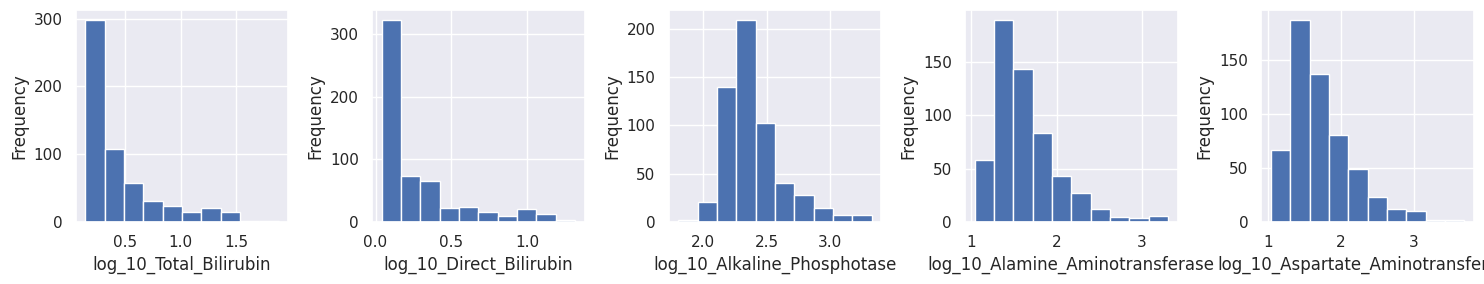

In [64]:
## Adding new log transformed features and visualizing their distributions

skewed_features = ['Total_Bilirubin',\
                   'Direct_Bilirubin', \
                   'Alkaline_Phosphotase', \
                   'Alamine_Aminotransferase', \
                   'Aspartate_Aminotransferase']

fig = plt.figure(figsize=(15,3))

print('Skewness of log transformed features:')
for idx, feature in enumerate(skewed_features):
    new_name = f'log_{feature}'
    df[new_name] = np.log10(df[feature]+1) #add 1 to features with 0 values to prevent -np.inf during log transform  
    print(new_name, ':\t', df[new_name].skew())

    sub = fig.add_subplot(1,5,idx+1) 
    sub.set_xlabel(f'log_10_{feature}')
    df[new_name].plot(kind='hist')
    plt.tight_layout()

In [65]:
df = df.drop(skewed_features, axis = 1)

### 2.2.1 Univariate Analysis

In [66]:
df.columns

Index(['Age', 'Gender', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'liver_disease_YN', 'log_Total_Bilirubin',
       'log_Direct_Bilirubin', 'log_Alkaline_Phosphotase',
       'log_Alamine_Aminotransferase', 'log_Aspartate_Aminotransferase'],
      dtype='object')

In [67]:
df_outliers_dropped.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'liver_disease_YN'],
      dtype='object')

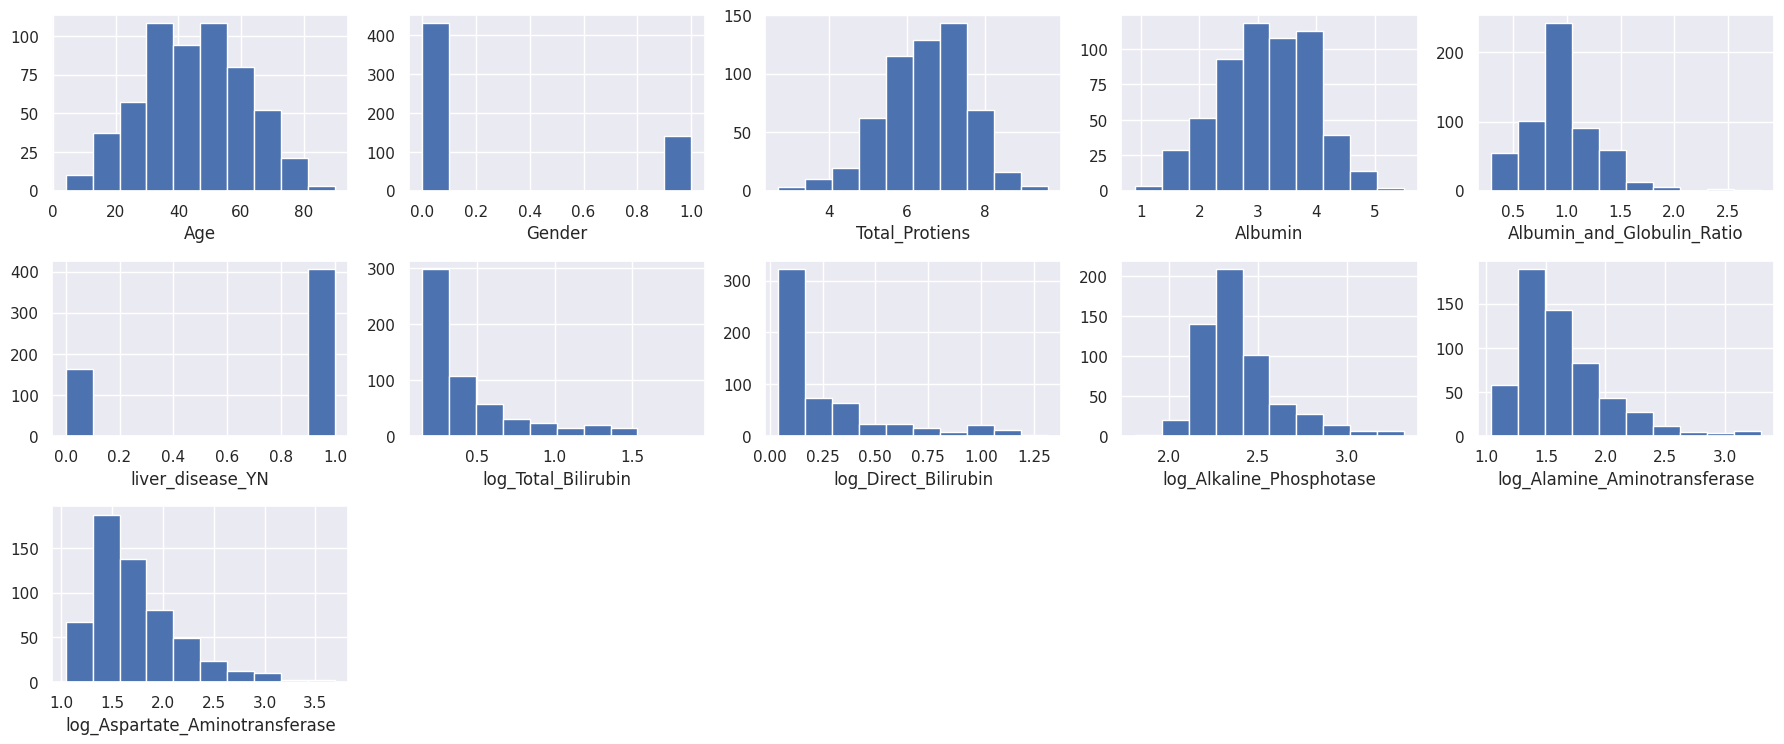

In [68]:
## Lets visualize the distributions of our features

fig = plt.figure(figsize = (18,12))

for idx, feature in enumerate(df.columns):
    sub = fig.add_subplot(5,5,idx+1)
    sub.set_xlabel(feature)
    df[feature].hist()
    plt.tight_layout()


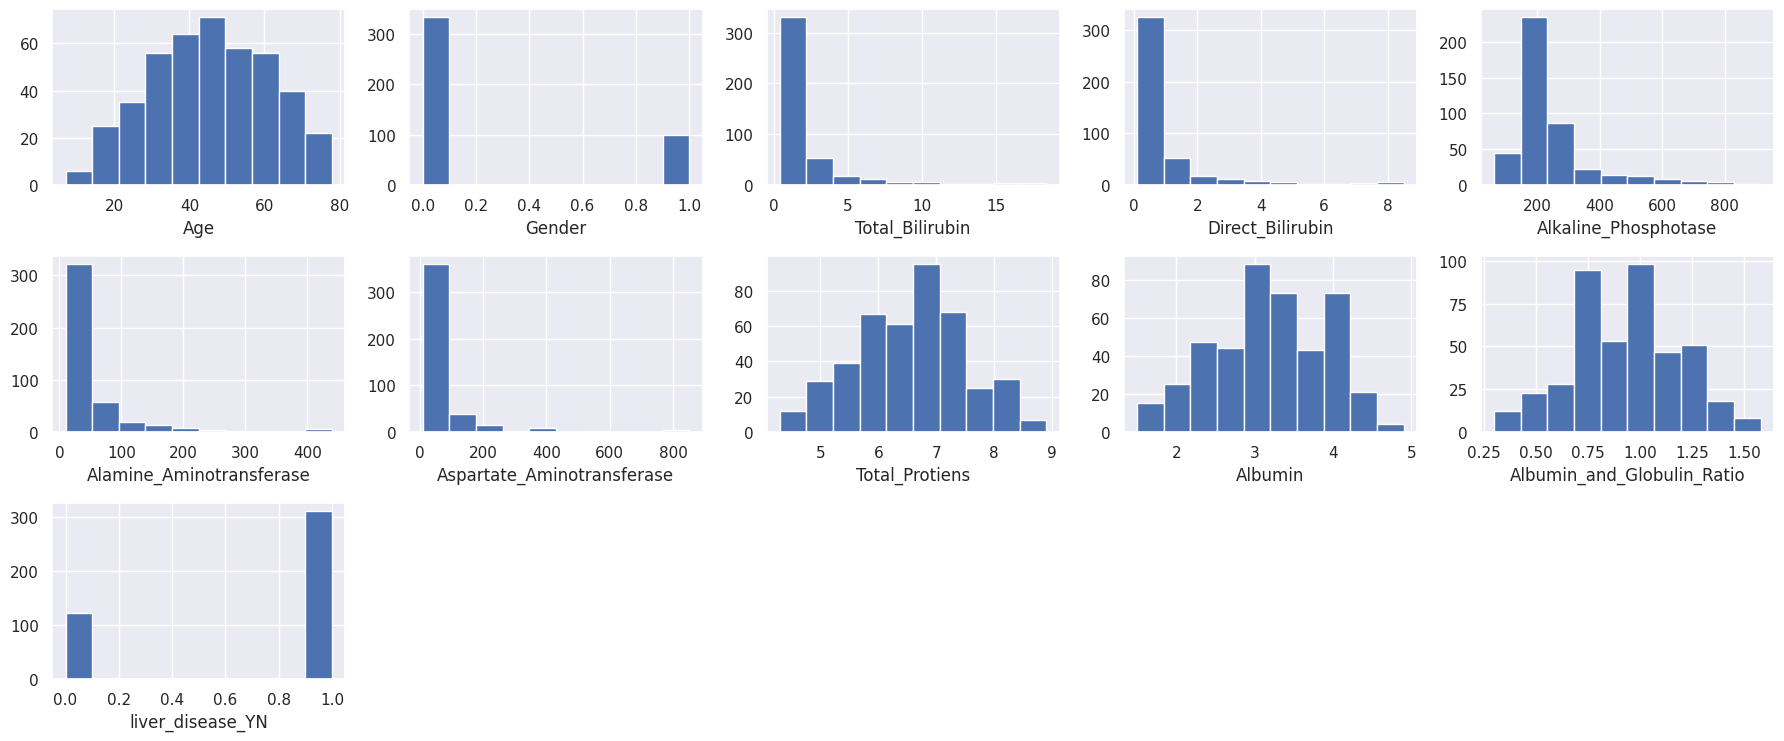

In [69]:
## df_outliers_dropped
## Lets visualize the distributions of our features

fig = plt.figure(figsize = (18,12))

for idx, feature in enumerate(df_outliers_dropped.columns):
    sub = fig.add_subplot(5,5,idx+1)
    sub.set_xlabel(feature)
    df_outliers_dropped[feature].hist()
    plt.tight_layout();


#### This is interesting. The following observations can be made from these plots.


1.   The median age of the participants is in the late 40s to early 50s range.
2.   More males have participated than females in the Liver health study. 
3. My initial hypothesis was that males in this geographical region have been facing higher amount of liver issues. Let's find out if this is the case in the next set of visualizations.
4. We do not have baseline values for healthy people in the dataset's Kaggle page, nor in the feature descripion. I will attempt to find this out using the groupby function for healthy livers (df.liver_disease_YN == 0).

In [73]:
## Artificial Baseline, Mean (not verified against medical standards)
baseline_avg = df_outliers_dropped[df_outliers_dropped.liver_disease_YN == 0].groupby('Gender').mean()
baseline_avg

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
Gender                                                                   
0      41.764            0.966             0.313               198.876   
1      41.212            0.761             0.185               182.091   

        Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
Gender                                                                         
0                         29.719                      34.461           6.710   
1                         23.848                      26.242           6.433   

        Albumin  Albumin_and_Globulin_Ratio  liver_disease_YN  
Gender                                                         
0         3.476                       1.054             0.000  
1         3.209                       0.961             0.000

In [74]:
df_outliers_dropped[df_outliers_dropped.liver_disease_YN == 1].groupby('Gender').mean()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
Gender                                                                   
0      47.820            2.791             1.314               273.164   
1      43.716            1.376             0.543               256.851   

        Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
Gender                                                                         
0                         69.291                      98.648           6.457   
1                         43.328                      50.463           6.791   

        Albumin  Albumin_and_Globulin_Ratio  liver_disease_YN  
Gender                                                         
0         3.036                       0.887             1.000  
1         3.293                       0.911             1.000

#### The above mean values seems very off, with significantly different values for Males and Females. Since mean is susceptible to outliers, lets redo this with median and compare the baseline median values of healthy subjects against subjects with liver disease (df.liver_disease_YN == 1).


In [75]:
## Artificial Baseline, Median (not verified against medical standards)
baseline_median = df_outliers_dropped[df_outliers_dropped.liver_disease_YN == 0].groupby('Gender').median()
baseline_median

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
Gender                                                                   
0      42.000            0.800             0.200               182.000   
1      42.000            0.700             0.200               182.000   

        Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
Gender                                                                         
0                         27.000                      26.000           6.700   
1                         23.000                      25.000           6.500   

        Albumin  Albumin_and_Globulin_Ratio  liver_disease_YN  
Gender                                                         
0         3.500                       1.000             0.000  
1         3.100                       0.900             0.000

In [76]:
df_outliers_dropped[df_outliers_dropped.liver_disease_YN == 1].groupby('Gender').median()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
Gender                                                                   
0      48.000            1.450             0.600               227.500   
1      45.000            0.800             0.200               189.000   

        Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
Gender                                                                         
0                         41.000                      51.000           6.500   
1                         25.000                      28.000           6.800   

        Albumin  Albumin_and_Globulin_Ratio  liver_disease_YN  
Gender                                                         
0         3.000                       0.900             1.000  
1         3.300                       0.900             1.000

#### Observations:
1. A simple visual comparison between the median tables reveals that in general, people with liver issues have higher feature medians than those with healthy livers, for both genders.
2. Albumin to Globulin ratio is lower for those with liver disease, for both genders.
3. The median age for those with liver disease is higher for both genders.
4. Females in the test group are susceptible to liver disease at a younger age than males. 
5. On a whole, this seems to indicate that older population in the region are more susceptible to liver disease. Could this be because of poor socio-economic conditions, access to disposable incomes leading to alcohol abuse, shortage of medical services?

#### Let's verify the above observations visually, and understand the distribution of features across the binary groups, Gender and Liver Disease.

{'Male': 0, 'Female': 1}


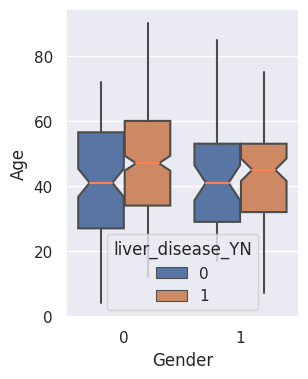

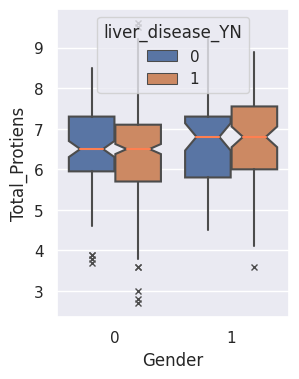

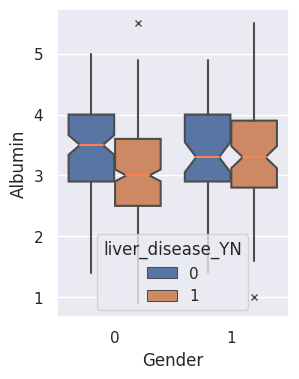

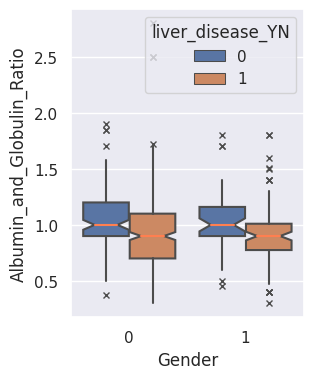

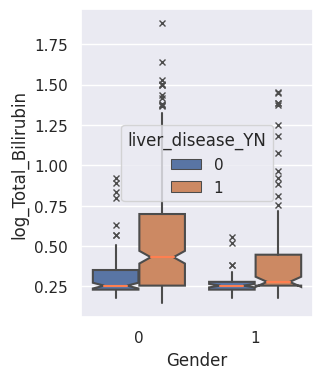

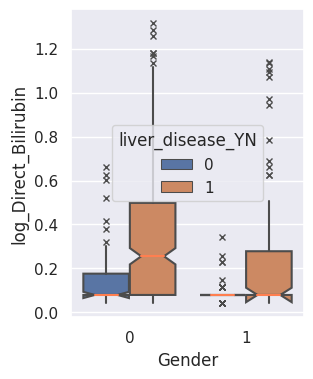

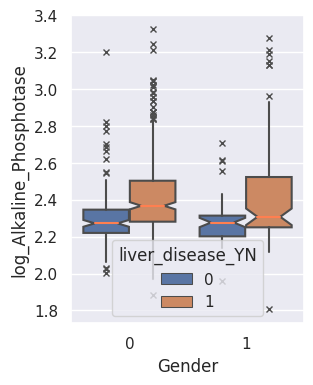

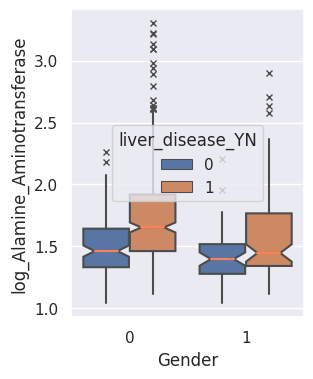

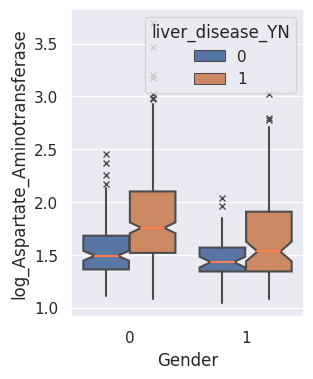

In [77]:
print(gender_replace_dict)

for feature in df.drop(['Gender', 'liver_disease_YN'],axis=1).columns:
    plt.figure(figsize=(3,4))
    sns.boxplot(df, x = 'Gender', y = feature, notch = True, flierprops={"marker": "x"},
                showcaps=False, medianprops={"color": "coral"}, hue = 'liver_disease_YN', dodge = True) #customizing the boxplots
    fig.savefig(f'barplot_{feature}_gender.png', bbox_inches='tight')
    plt.show();

{'Male': 0, 'Female': 1}


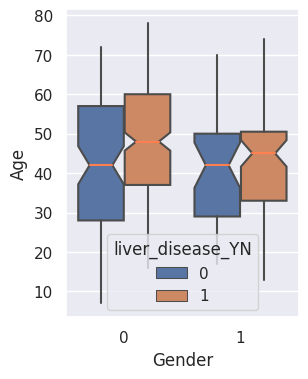

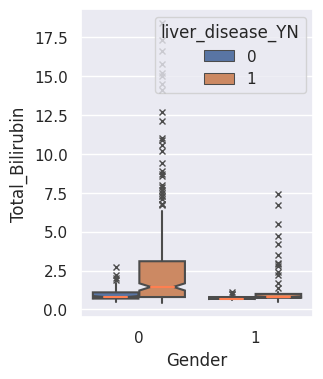

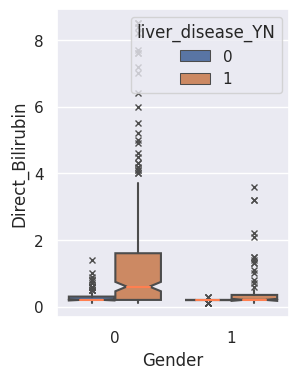

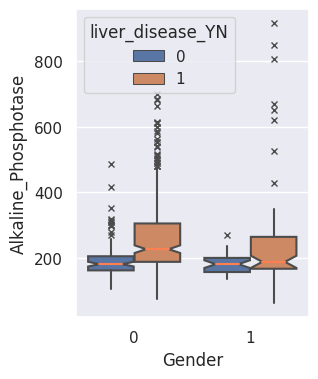

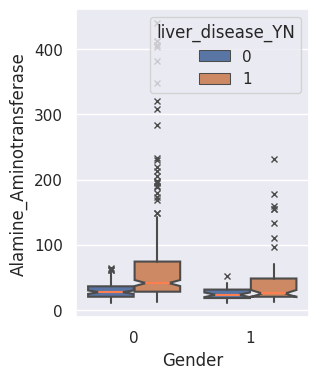

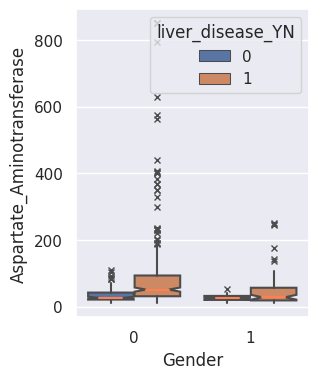

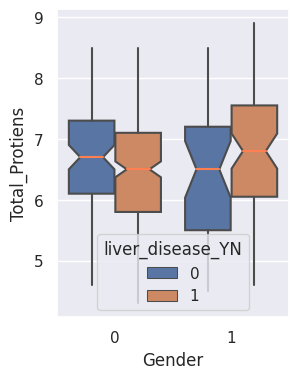

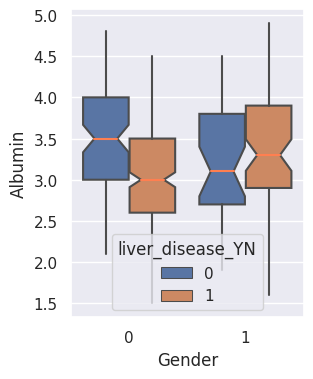

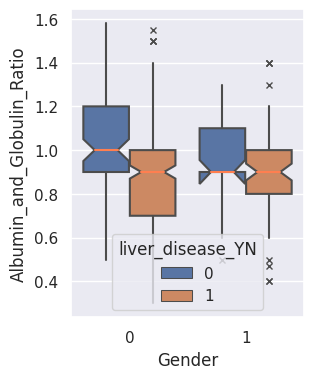

In [78]:
## df_outliers_dropped
print(gender_replace_dict)

for feature in df_outliers_dropped.drop(['Gender', 'liver_disease_YN'],axis=1).columns:
    plt.figure(figsize=(3,4))
    sns.boxplot(df_outliers_dropped, x = 'Gender', y = feature, notch = True, flierprops={"marker": "x"},
                showcaps=False, medianprops={"color": "coral"}, hue = 'liver_disease_YN', dodge = True) #customizing the boxplots
    fig.savefig(f'barplot_{feature}_gender.png', bbox_inches='tight')
    plt.show();

#### Observations
1. Within each gender, feature medians tend to be higher for those with liver disease as opposed to healthy subjects. An excpetion to this is 2 features - Albumin, Albumin-Globulin ratio, where diseased subjects tend to score lower.

2. The feature 'Total_Protiens' doesn't provide additional insights within the gender groups, and across the target (diseased or not) groups.

3. The features log_direct_bilirubin and log_total_bilirubin show a significant difference in liver health status across both genders, and higher feature values seem to correspond towards having liver problems.

3. There's too much of an overlap of the Inter Quartile Range of the barplots to infer conclusively, that any of the features influence liver disease for either genders. I suspect a one-way ANOVA test between the named groups would give different insights, so I'll move forward with the analysis.

### 2.2.2 Multivariate Analysis

<Figure size 1600x2000 with 0 Axes>

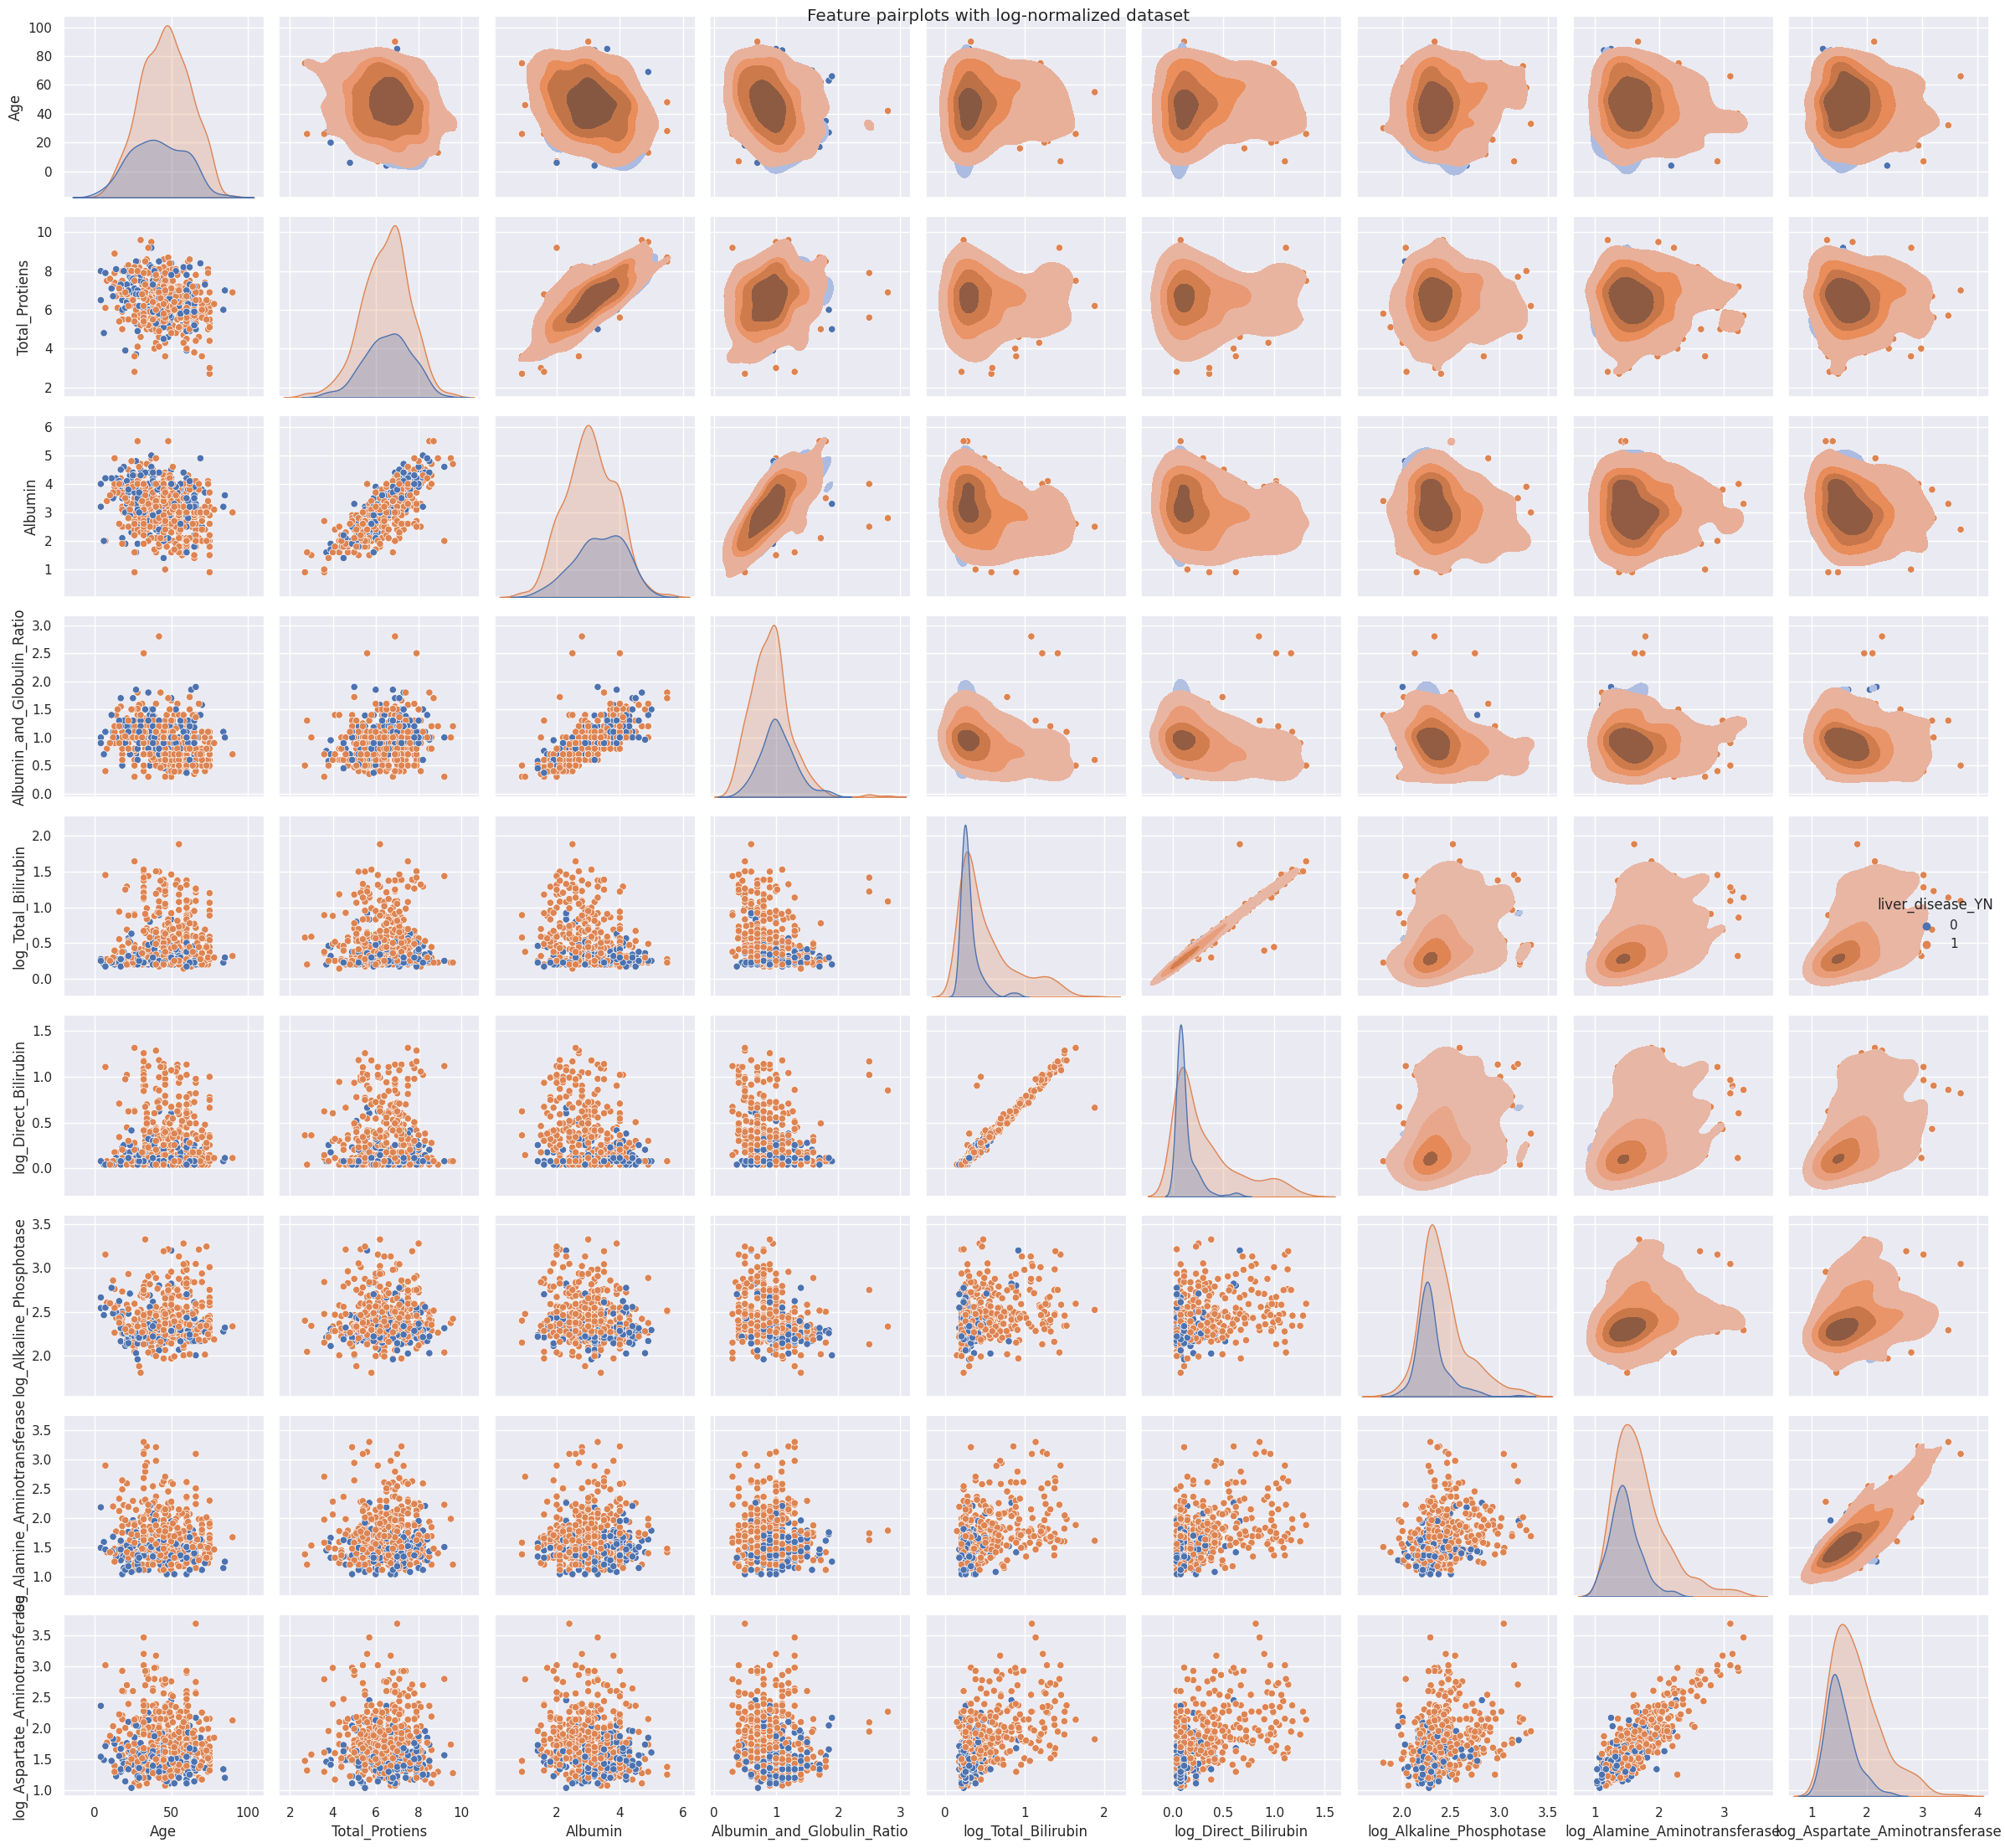

In [81]:
plt.figure(figsize=(16,20))
g = sns.pairplot(df.drop('Gender', axis = 1), hue = 'liver_disease_YN')
g.map_upper(sns.kdeplot, levels = 5, hue = df['liver_disease_YN'], fill = True)
plt.suptitle('Feature pairplots with log-normalized dataset')
plt.tight_layout()
plt.show();

<Figure size 1600x2000 with 0 Axes>

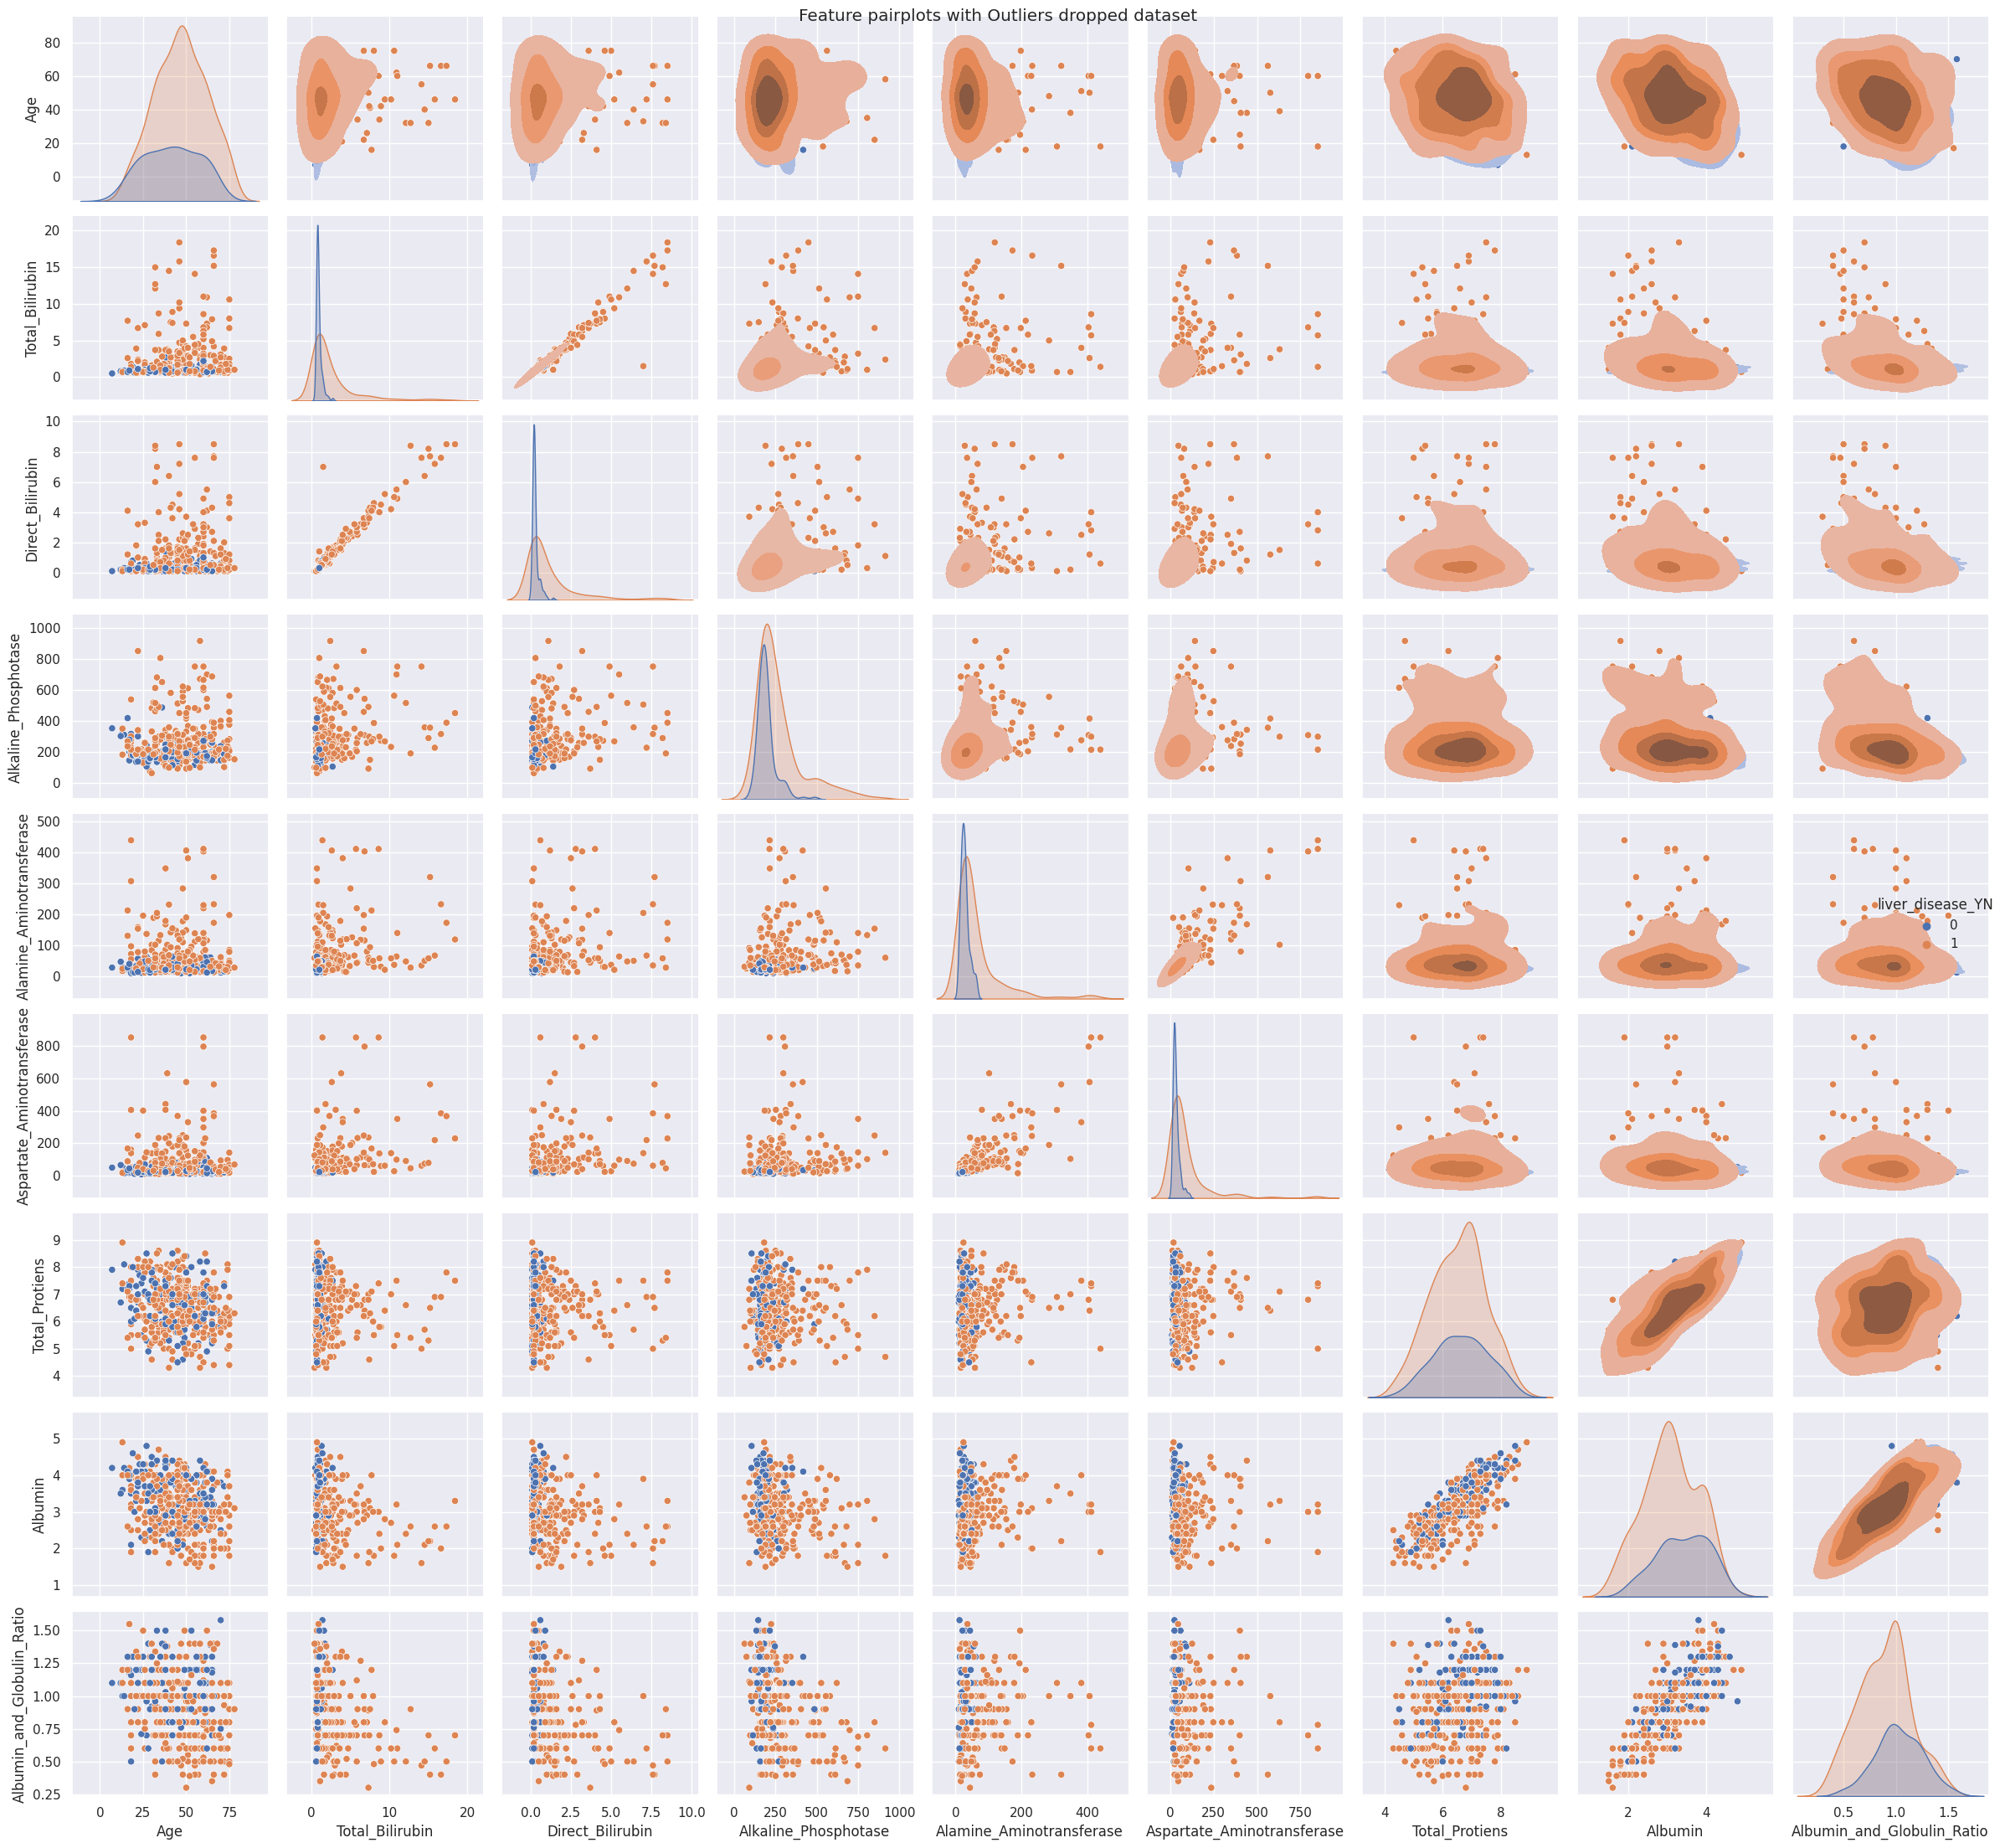

In [82]:
## df_outliers_dropped
plt.figure(figsize=(16,20))
g = sns.pairplot(df_outliers_dropped.drop('Gender', axis = 1), hue = 'liver_disease_YN')
g.map_upper(sns.kdeplot, levels = 5, hue = df_outliers_dropped['liver_disease_YN'], fill = True)
plt.suptitle('Feature pairplots with Outliers dropped dataset')
plt.tight_layout()
plt.show();

#### The pairplot reveals some interesting trends in the data.
1. Only 4 feature pairs exhibit a strong collinearity.
2. The remaining pairplots do not seem to show any trends.

I will verify this with a correlation map.

In [83]:
def corr_map(df, title, method='spearman', numeric_only = True, tick_size = 10, annot_size=10, annot_kws=10):
    mask = np.triu(np.ones_like(df.corr(method=method,numeric_only=numeric_only), dtype=bool))
    heatmap = sns.heatmap(df.corr(method=method, numeric_only = numeric_only), fmt = '.2f',  annot = True, annot_kws = {'size': annot_kws}, mask=mask, cmap='BrBG')#
    plt.xticks(rotation=80, fontsize= tick_size)
    plt.yticks( fontsize= tick_size)
    
    heatmap.set_title(title, fontdict={'fontsize':annot_size}, pad=12)
    plt.show();

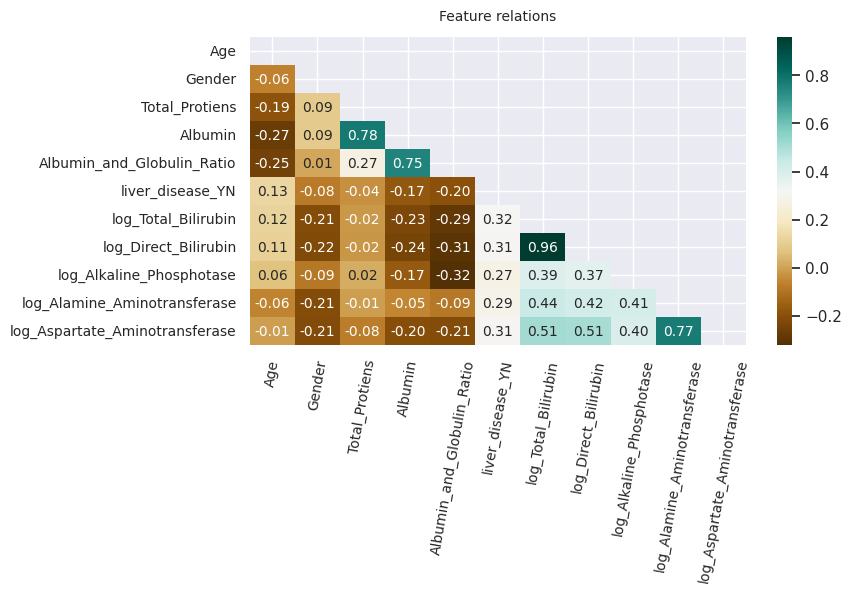

In [84]:
plt.figure(figsize=(8, 4))
corr_map(df, 'Feature relations in log-normalized dataset')

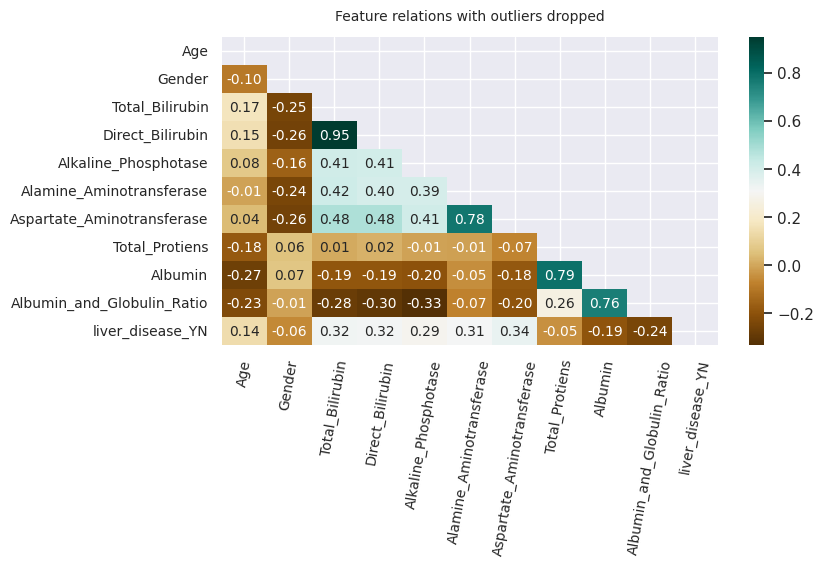

In [86]:
## df_outliers_dropped
plt.figure(figsize=(8, 4))
corr_map(df_outliers_dropped, 'Feature relations with outliers dropped')

#### As expected, 4 feature pairs (given below) are strongly correlated, with pair 3 having a near perfect positive correlation of 1.
    1. Albumin and Total_Protiens, 
    2. Albumin and Albumin_and_Globulin_Ratio,
    3. log_Total_Bilirubin and log_Direct_Bilirubin / Total_Bilirubin and Direct_Bilirubin ,
    4. log_Alamine_Aminotransferase and log_Aspartate_Aminotransferase / Alamine_Aminotransferase and Aspartate_Aminotransferase.

### Now that we've cleaned up our dataset and extracted some important insights and engineered the features, we will move on to model training and evaluation.

## 2.3 Model Training, Hyperparameter Tuning and Evaluation

* I will use **AdaBoostClassifier** and **RandomForestClassifier** for this task.

* Instead of train_test_split, I will use **StratifiedKFold** cross validation strategy.

* For hyperparameter tuning, I will use **GridSearchCV**.

* I will test these strategies for both log-normalized dataframe and outliers-dropped dataframe.

In [87]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [90]:
X = df.drop('liver_disease_YN', axis =1)
y = df['liver_disease_YN']
X_out_dropped =  df_outliers_dropped.drop('liver_disease_YN', axis =1)
y_out_dropped = df_outliers_dropped['liver_disease_YN']

In [89]:
# Initialize StratifiedKFold class
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

**AdaBoost**

In [97]:
## Log Normalized

## Define parameter grids for GridSearchCV for AdaBoost Classifier
adaboost= AdaBoostClassifier()
adaboost_params = {'n_estimators':[205, 210, 215, 220, 225], 'learning_rate':[1.7, 1.75, 1.8, 1.85, 1.9, 2]}

## GridSearchCV for AdaBoost Classifier
ada_grid = GridSearchCV(adaboost, adaboost_params, cv = skf, scoring = 'precision') 
#setting scoing to precision so as to reduce False negatives in disease detection
ada_grid.fit(X,y)

print(ada_grid.best_estimator_)
print('mean_test_score:\n',ada_grid.cv_results_['mean_test_score'])

AdaBoostClassifier(learning_rate=1.8, n_estimators=220)
mean_test_score:
 [0.76119736 0.76670334 0.7634738  0.7661688  0.7704282  0.74801378
 0.75303042 0.751944   0.75374083 0.76174942 0.76737029 0.76888878
 0.77538514 0.78058949 0.77713585 0.76402735 0.75873887 0.76062369
 0.75439158 0.75481335 0.77092061 0.77202631 0.76522047 0.76677569
 0.75869985 0.7122807  0.39802689 0.7122807  0.39802689 0.7122807 ]


In [98]:
## Outliers Dropped

## Define parameter grids for GridSearchCV for AdaBoost Classifier
adaboost= AdaBoostClassifier()
adaboost_params = {'n_estimators':[205, 210, 215, 220, 225], 'learning_rate':[1.7, 1.8, 1.85, 2, 2.25, 2.5, 2.75, 3]}

## GridSearchCV for AdaBoost Classifier
ada_grid2 = GridSearchCV(adaboost, adaboost_params, cv = skf, scoring = 'precision') 
#setting scoing to precision so as to reduce False negatives in disease detection
ada_grid2.fit(X_out_dropped,y_out_dropped)

print(ada_grid2.best_estimator_)
print('mean_test_score:\n',ada_grid2.cv_results_['mean_test_score'])

AdaBoostClassifier(learning_rate=2, n_estimators=210)
mean_test_score:
 [0.78429399 0.79000314 0.78994723 0.78473926 0.78114287 0.78051938
 0.79667394 0.7922555  0.7841397  0.79184437 0.77845427 0.78665689
 0.78556343 0.78130269 0.78368946 0.71828753 0.88091717 0.71828753
 0.88091717 0.71828753 0.719926   0.72344274 0.719926   0.72344274
 0.719926   0.719926   0.719926   0.719926   0.719926   0.719926
 0.719926   0.719926   0.719926   0.719926   0.719926   0.719926
 0.719926   0.719926   0.719926   0.719926  ]


**RandomForest**

In [99]:
## Log Normalized
## Define parameter grids for GridSearchCV for RandomForest Classifier
randomforest = RandomForestClassifier()
rf_params = {'max_depth': [None, 20, 25, 26, 27, 28], 'n_estimators':[200, 210, 215, 220, 225, 230], 'warm_start':[True, False]}

## GridSearchCV for RandomForest Classifier
rf_grid = GridSearchCV(randomforest, rf_params, cv = skf, scoring = 'precision')
rf_grid.fit(X,y)

print(rf_grid.best_estimator_)
print('mean_test_score:\n',rf_grid.cv_results_['mean_test_score'])

RandomForestClassifier(n_estimators=215)
mean_test_score:
 [0.74595222 0.74447686 0.75278842 0.75072079 0.7543341  0.76269359
 0.7485144  0.74427931 0.74309417 0.74330749 0.75014155 0.7498719
 0.75349494 0.74792503 0.75040873 0.74740887 0.73818919 0.75629875
 0.75588812 0.75503347 0.75397587 0.74247686 0.7451894  0.74824048
 0.75268404 0.75672758 0.74931341 0.75076949 0.75015133 0.75188662
 0.75524333 0.74912128 0.74770764 0.73503432 0.75185514 0.75087521
 0.74111003 0.75341235 0.74786696 0.75000875 0.75076008 0.7452151
 0.74453287 0.7474782  0.75248054 0.74817508 0.74840162 0.75086426
 0.74829372 0.74773519 0.74562407 0.75520429 0.75128788 0.74013385
 0.74939066 0.74948704 0.7461294  0.74489846 0.74270319 0.73960523
 0.7539718  0.74682651 0.75168779 0.75253498 0.75249524 0.75511406
 0.74722956 0.74528435 0.75272061 0.75241151 0.74241985 0.75048657]


In [101]:
## Outliers dropped

## Define parameter grids for GridSearchCV for RandomForest Classifier
randomforest = RandomForestClassifier()
rf_params = {'max_depth': [None,10, 15, 20, 25, 26], 'n_estimators':[180, 190, 200, 210, 215], 'warm_start':[True, False]}

## GridSearchCV for RandomForest Classifier
rf_grid2 = GridSearchCV(randomforest, rf_params, cv = skf, scoring = 'precision')
rf_grid2.fit(X_out_dropped,y_out_dropped)

print(rf_grid2.best_estimator_)
print('mean_test_score:\n',rf_grid2.cv_results_['mean_test_score'])

RandomForestClassifier(max_depth=15, n_estimators=200, warm_start=True)
mean_test_score:
 [0.76712432 0.76427205 0.76957998 0.76804804 0.7606246  0.76778043
 0.76652565 0.76089026 0.75910353 0.76754808 0.76332852 0.75964132
 0.76800753 0.76472895 0.74653539 0.76656838 0.76397269 0.76952521
 0.76266176 0.7573399  0.76697511 0.76638696 0.76391165 0.76309306
 0.78287963 0.76759245 0.77066479 0.76502216 0.76270099 0.77348581
 0.76065061 0.76980881 0.76599695 0.76820181 0.76043143 0.77110028
 0.76017536 0.77085514 0.75526988 0.77066387 0.76082672 0.76188775
 0.76788293 0.77429888 0.76750605 0.76372529 0.76832873 0.7771956
 0.76764317 0.7644606  0.76311184 0.76989644 0.77065684 0.76873965
 0.76839335 0.7615916  0.77434713 0.76175667 0.77004168 0.76779506]


#### **Model Evaluation**

In [118]:
## Evaluate the models using cross-validation scores
adaboost_log_norm_scores = ada_grid.cv_results_['mean_test_score']
adaboost_outliers_drop_scores = ada_grid2.cv_results_['mean_test_score']
rf_log_norm_scores = rf_grid.cv_results_['mean_test_score']
rf_outliers_drop_scores = rf_grid2.cv_results_['mean_test_score']

## Print the cross-validation scores
print("Cross-validation results for AdaBoostClassifier:")

print(f"Best parameters for Log_normed + AdaBoostClassifier: {ada_grid.best_params_}")
#print('AdaBoost LogNormed\n',adaboost_log_norm_scores, '\n\n')

print("Best parameters for Outliers_drop + AdaBoostClassifier:", ada_grid2.best_params_)
#print('AdaBoost outliers_dropped\n',adaboost_outliers_drop_scores, '\n\n')

print("\nCross-validation results for RandomForestClassifier:")

print("Best parameters for Log_normed +  RandomForestClassifier:", rf_grid.best_params_)
#print('RandomForest LogNormed\n',rf_log_norm_scores, '\n\n')

print("Best parameters for Outliers_drop + RandomForestClassifier:", rf_grid2.best_params_)
#print('RandomForest OutliersDropped\n',rf_outliers_drop_scores, '\n\n')

Cross-validation results for AdaBoostClassifier:
Best parameters for Log_normed + AdaBoostClassifier: {'learning_rate': 1.8, 'n_estimators': 220}
Best parameters for Outliers_drop + AdaBoostClassifier: {'learning_rate': 2, 'n_estimators': 210}

Cross-validation results for RandomForestClassifier:
Best parameters for Log_normed +  RandomForestClassifier: {'max_depth': None, 'n_estimators': 215, 'warm_start': False}
Best parameters for Outliers_drop + RandomForestClassifier: {'max_depth': 15, 'n_estimators': 200, 'warm_start': True}


In [120]:
print('Best Precision score with skewed features log normalized:')
print('AdaBoost:', np.max(adaboost_log_norm_scores))
print('RandomForest', np.max(rf_log_norm_scores))

Best Precision score with skewed features log normalized:
AdaBoost: 0.7805894943818507
RandomForest 0.7626935905656405


In [108]:
print('Best Precision score with outliers dropped:')
print('AdaBoost:', np.max(adaboost_outliers_drop_scores))
print('RandomForest', np.max(rf_outliers_drop_scores))

Best Precision score with outliers dropped:
AdaBoost: 0.8809171669483786
RandomForest 0.7828796313113597


# 2.4 Final Report and Conclusion: Comparison of Estimators
 After multiple rounds of hyperparameter tuning and refitting, we have found that **Adaboost Classifier is marginally better than Random Forest Classifier**. 
 
 **Dropping outliers massively improved the model precisions than simple log-normaliztion.**
 
 In GridSearchCV for both classifiers, I have chosen the value for **scoring as precision**, since my primary goal is **to minimize false negatives.** 

* **Hyperparameter tuning with log normalization** of heavily skewed features for AdaBoost and RandomForest Classifiers has **improved maximum mean precision scores of ~70% when fitted with default parameter values, to the the present maximum mean scores of 78% and 76% respectively.**

* **Hyperparameter tuning with outlier removal**  has shown **significant improvement in maximum mean precision scores for AdaBoost classifier from 78% to 88%, and RandomForest classifier from 76% to 78% respectively.**

 There might be a scope for improvement in model scores with a different set of classifier algorithms such as XGBoost, LightGBM, CatBoost. 

The **low maximum mean precision of <80% in RandomForest classifier can be explained** by our observation during EDA that there's a **significant overlap in the IQR of the boxplots** among features, when grouped by Gender and Liver_disease_YN feature. The **pairplots and correlation heatmaps have reconfirmed** this: the scatters and kde plots show significant overlaps, and low correlation among feature pairs.

While there exists **an argument that model precision can be improved by augmenting the data** with synthetic datapoints, I'm not exploring these strategies for the following reasons: 
* Firstly, oversampling strategies like ADASYN, SMOTE or SMOTENC may not work as they create point-bridges in the minority target class. We've observed that the minority and majority classes are **embedded and enmeshed deeply iside each other.** This is evident form the pairplots where distinct clusters are not visible. Using these may further deteriorate the predictive power of our model.
* Secondly, **undersampling causes a loss of information** as the dataset is small and so, this strategy is undesirable. 
* Lastly, I'm also not considering using the combination srategy of SMOTETomek since this too causes a loss in information in such a small dataset.

*If there is less of an overlap between the clusters based on target, intuition says,* **using BorderlineSMOTE with AdaBoost or its variant, the EasyEnsembleClassifier which uses AdaBoost as the base estimator will give a better model precision.** 

The **below combinations are recommended** for to be tested with different cross-validation strategies for arriving at better estimators and models.

1. SMOTENC + AdaBoostClassifier
2. SMOTENC + RandomForestClassifier, 
3. BorderlineSMOTE + AdaBoostClassifier,
4. BorderlineSMOTE + RandomForestClassifier
5. EasyEnsembleClassifier
6. BalancedRandomForestClassifier